# PCA analysis on MNIST dataset

# import library

In [19]:
!pip install tensorflow
!pip install keras
!pip install tensorflow-datasets

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# load the data set and fill nan value with 0

In [21]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784) # reshape to 2D array
X_test = X_test.reshape(-1, 784)
X_train = np.nan_to_num(X_train) # fill nan with 0
X_test = np.nan_to_num(X_test)

# show 50 first of this images

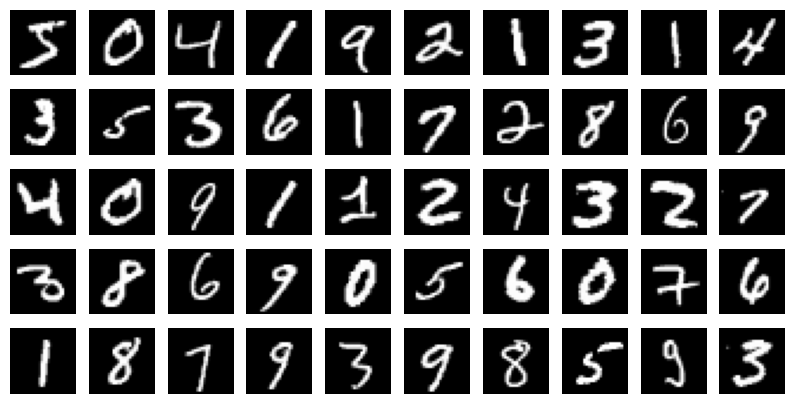

In [22]:
def show_images(num_images, X):
    plt.figure(figsize=(10, 5)) # set the figure size
    for i in range(num_images): # loop over the images
        plt.subplot(5, 10, i+1) # create subplots
        plt.imshow(X[i].reshape(28, 28), cmap='gray') # plot the images
        plt.axis('off') # turn off the axes
    plt.show() # show the plot

show_images(50, X_train) # show the first 50 images of the training set

# scale the data set to [0 1] + divide data to maximum value

In [23]:
X_train = X_train / 255.0 # divide data to maximum value
X_test = X_test / 255.0

# calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix

In [24]:
cov_matrix = np.cov(X_train.T) # transpose to get features as rows
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [25]:
# explained_variance = 0.7 # you can change this variable to get more component of datasets.
explained_variance = 0.7

# calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.

In [26]:
total_variance = np.sum(eig_values)
k = 0 # number of components
variance_sum = 0 # cumulative sum of variance
for i in range(len(eig_values)):
    variance_sum += eig_values[i]
    if variance_sum / total_variance >= explained_variance:
        k = i + 1 # index starts from 0
        break

#  calculate the compression_ratio

In [27]:
compression_ratio = k / len(eig_values)
print(f'Compression ratio: {compression_ratio}')

Compression ratio: 0.03316326530612245


# Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)

In [28]:
F_train = X_train @ eig_vectors[:, :k] # matrix multiplication
F_test = X_test @ eig_vectors[:, :k]

# Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)

In [29]:
X_k_train = F_train @ eig_vectors[:, :k].T # V is orthogonal, so transpose is inverse
X_k_test = F_test @ eig_vectors[:, :k].T

# select on sample and reshape it to a 28 by 28 matrix and plot them as image

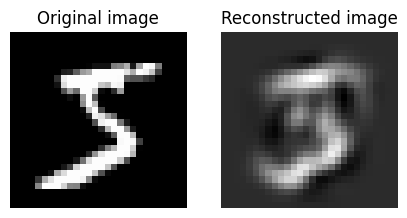

In [30]:
sample_index = 0 # you can change this index to see different samples
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train[sample_index].reshape(28, 28), cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X_k_train[sample_index].reshape(28, 28), cmap='gray')
plt.title('Reconstructed image')
plt.axis('off')
plt.show()

#  plot the dimentionally reduced data

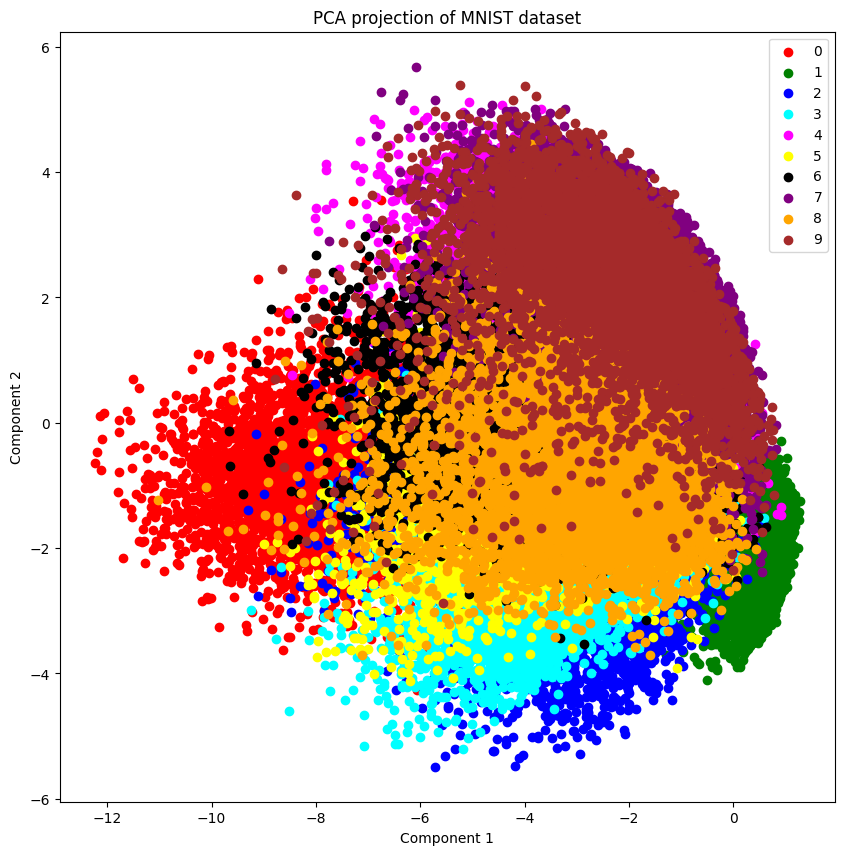

In [31]:
plt.figure(figsize=(10, 10))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown']
for i in range(10): # loop over classes
    plt.scatter(F_train[y_train == i, 0], F_train[y_train == i, 1], c=colors[i], label=i) # plot first two components
plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA projection of MNIST dataset')
plt.show()

# plot the original data

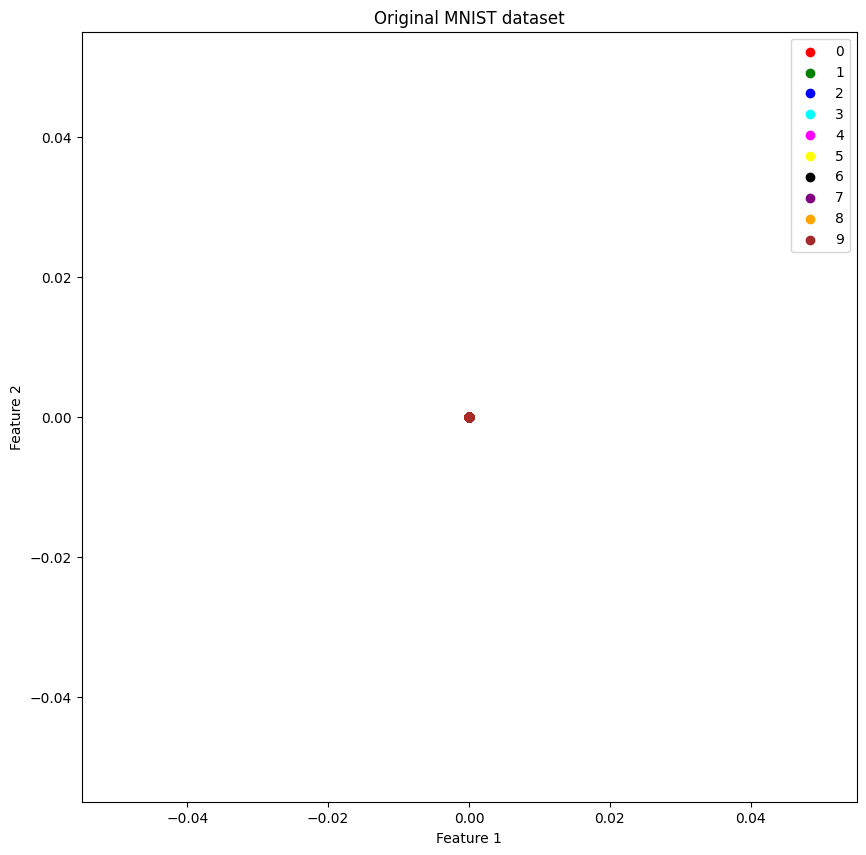

In [32]:
plt.figure(figsize=(10, 10))
for i in range(10): # loop over classes
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=colors[i], label=i) # plot first two features
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original MNIST dataset')
plt.show()

# Perform PCA and Gauge Max Accuracy

# complete below function using python PCA function

In [41]:
def do_pca(n_components, data):
    # input number of component and not normalized data set. output is the projected dataset
    scaler = StandardScaler() # create a scaler object
    data_scaled = scaler.fit_transform(data) # fit and transform the data
    pca = PCA(n_components=n_components) # create a PCA object with n_components
    data_projected = pca.fit_transform(data_scaled) # fit and transform the data
    return data_projected # return the projected data

# define a function that gets the X data and Y labels and returns the accuracy of ml model

In [42]:
def ML_model(X, y, print_output=True):
    # split the data into train and test sets
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    # create a logistic regression model
    model = LogisticRegression(max_iter=1000)
    # fit the model on the train set
    model.fit(X_train, y_train)
    # predict on the test set
    y_pred = model.predict(X_test)
    # calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # print the output if required
    if print_output:
        print(f'Accuracy: {accuracy}')
        print(f'Confusion matrix:\n{sklearn.metrics.confusion_matrix(y_test, y_pred)}')
    # return the accuracy score
    return accuracy

# your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)

In [45]:
accuracies = []
# loop over the number of components from 2 to 101
for n in range(2, 102):
    # project the data using do_pca function
    F_train = do_pca(n_components=n, data=X_train)
    # get the accuracy using ML_model function without printing output
    accuracy = ML_model(F_train, y_train, print_output=False)
    # append the accuracy to the list
    accuracies.append(accuracy)

# plot the accuracy based on components

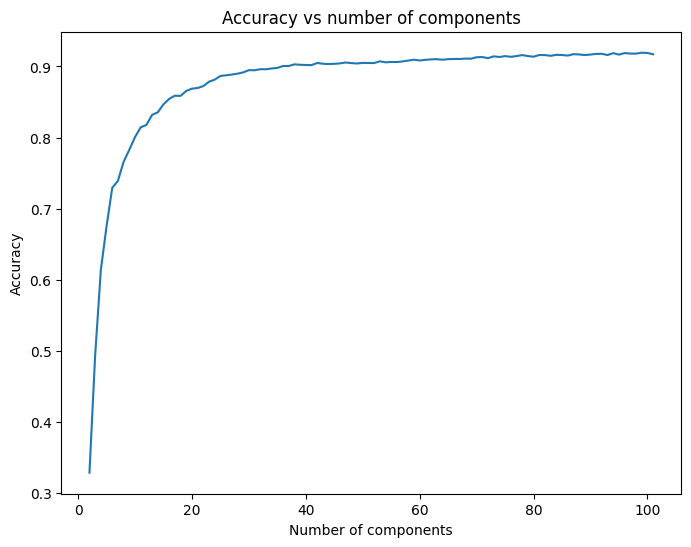

In [46]:
plt.figure(figsize=(8, 6)) # set the figure size
plt.plot(range(2, 102), accuracies) # plot the accuracies vs number of components
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs number of components')
plt.show()

#  print the number of components that maximize the accuracy and the max accuracy

In [47]:
max_index = np.argmax(accuracies) # find the index of the maximum accuracy
max_n = max_index + 2 # find the corresponding number of components
max_accuracy = accuracies[max_index] # find the maximum accuracy

print(f'Number of components that maximize the accuracy: {max_n}')
print(f'Maximum accuracy: {max_accuracy}')

Number of components that maximize the accuracy: 99
Maximum accuracy: 0.9193333333333333
